In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings as wr
wr.filterwarnings('ignore')

In [9]:
import pandas as pd
gender_submission = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.describe().T.style.bar(subset=["mean"],color="#606ff2").background_gradient(
  subset=["std"],cmap="PuBu").background_gradient(subset=["50%"],cmap="PuBu")


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train=train.drop(["PassengerId","Ticket","Cabin"],axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [16]:
train.shape

(891, 9)

In [17]:
train["Age"].fillna(train["Age"].mean(),inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

Number of people dead as 0 are 549 and Number of people survived as 1 are 342


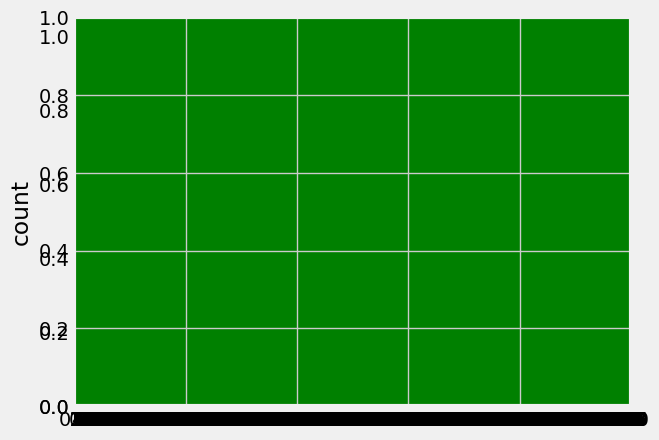

In [18]:
print(f'Number of people dead as 0 are {train.Survived.value_counts()[0]} and Number of people survived as 1 are {train.Survived.value_counts()[1]}')
sns.countplot(train["Survived"])
ax = plt.axes()
ax.set_facecolor("green")

plt.show()

In [19]:
def bar_chart(column):
    survived=train[train["Survived"]==1][column].value_counts()
    dead=train[train["Survived"]==0][column].value_counts()
    df1=pd.DataFrame([survived,dead])
    df1.index=["Survived","Dead"]
    df1.plot(kind="bar",figsize=(10,5))
    ax = plt.axes()
    ax.set_facecolor("green")

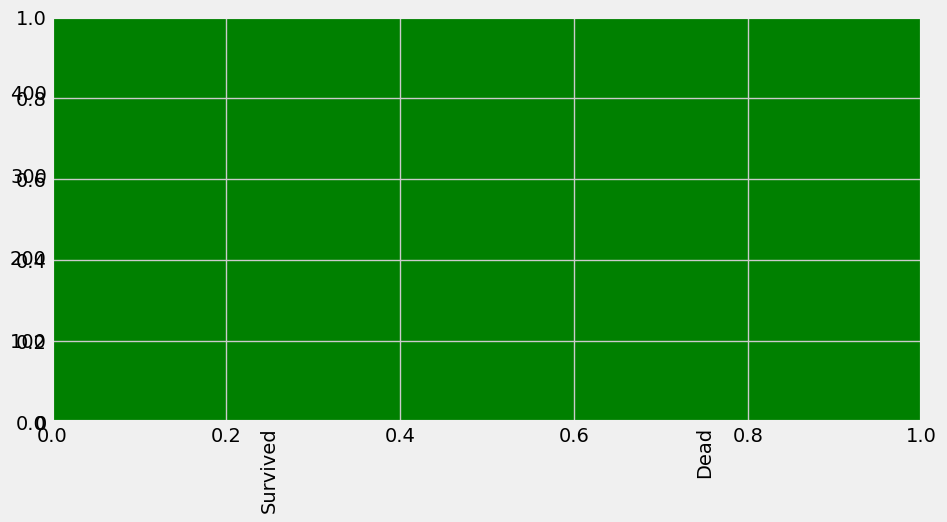

In [20]:
bar_chart("Sex")

In [21]:
train.loc[train['Sex'] == "male", 'Sex'] = 0
train.loc[train['Sex'] == "female", 'Sex'] = 1

Number of people having sex as male are 577 and Number of people having sex as female are 314


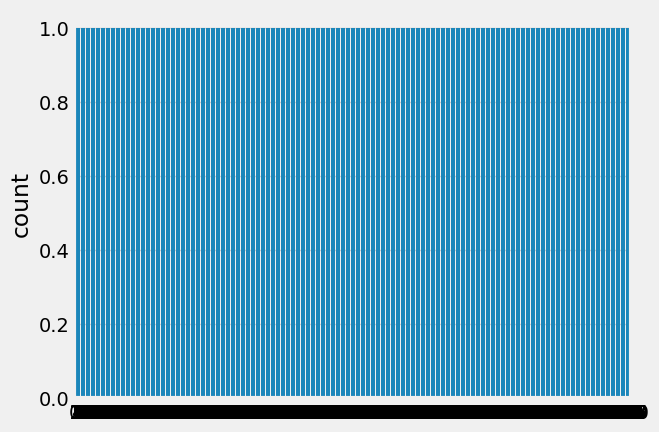

In [22]:
print(f'Number of people having sex as male are {train.Sex.value_counts()[0]} and Number of people having sex as female are {train.Sex.value_counts()[1]}')
sns.countplot(train["Sex"])
plt.show()

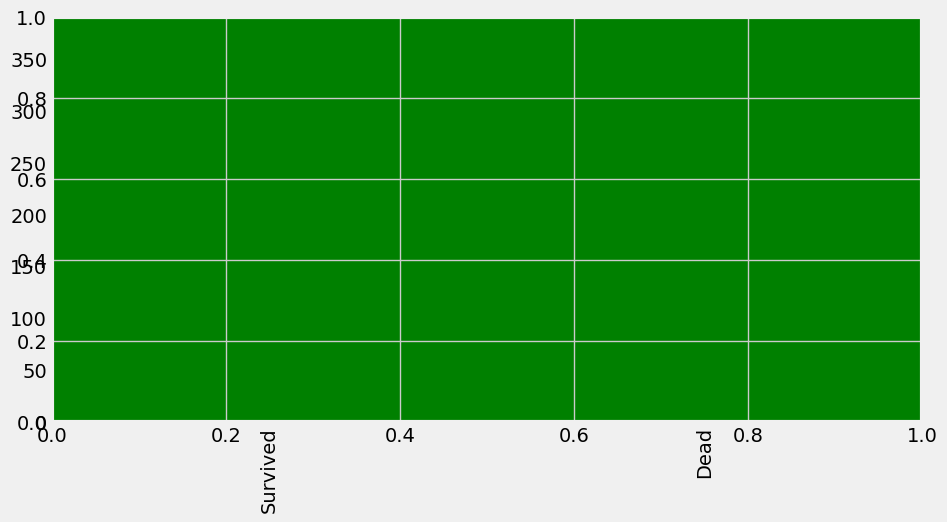

In [23]:
bar_chart("Pclass")

Number of people travel in 1st class are 216 and Number of people travil in 3rd class are 491


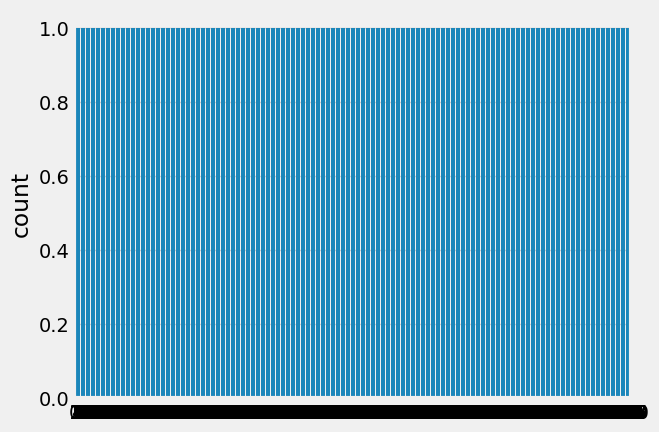

In [24]:
print(f'Number of people travel in 1st class are {train.Pclass.value_counts()[1]} and Number of people travil in 3rd class are {train.Pclass.value_counts()[3]}')
sns.countplot(train["Pclass"])
plt.show()

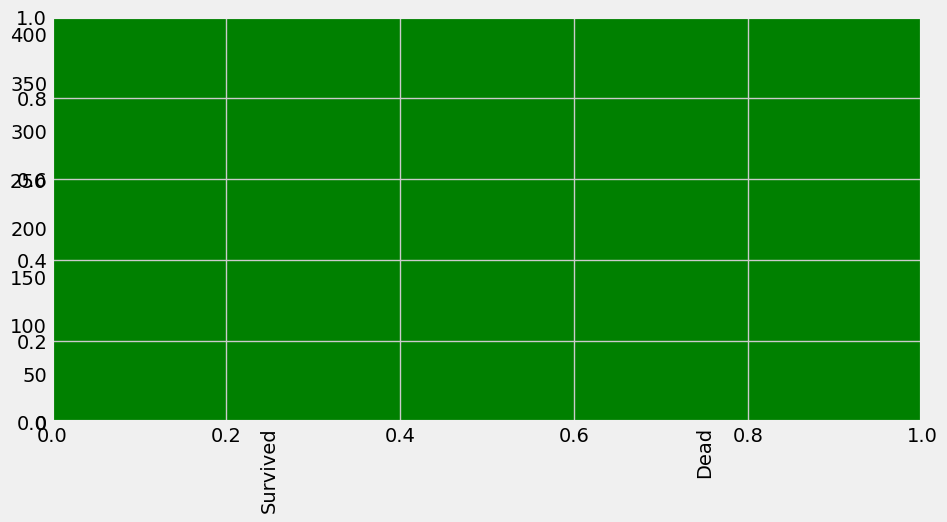

In [25]:
bar_chart("SibSp")

In [26]:

def box_plot(column):
    train.boxplot(by="Survived",column=[column],grid=True)
    ax = plt.axes()
    ax.set_facecolor("green")

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


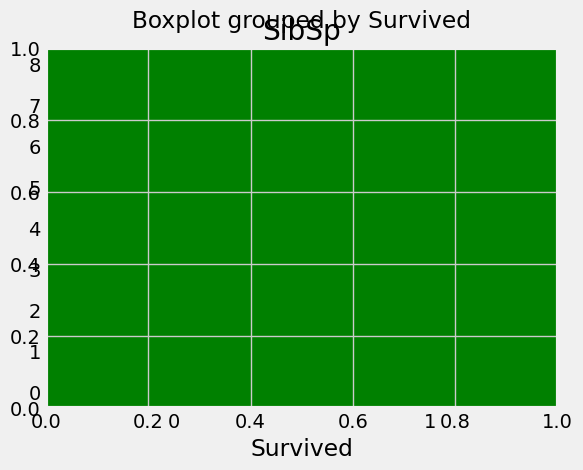

In [27]:
print(train["SibSp"].value_counts())

box_plot("SibSp")

In [28]:
train.nlargest(12,["SibSp"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,"Sage, Master. Thomas Henry",0,29.699118,8,2,69.55,S
180,0,3,"Sage, Miss. Constance Gladys",1,29.699118,8,2,69.55,S
201,0,3,"Sage, Mr. Frederick",0,29.699118,8,2,69.55,S
324,0,3,"Sage, Mr. George John Jr",0,29.699118,8,2,69.55,S
792,0,3,"Sage, Miss. Stella Anna",1,29.699118,8,2,69.55,S
846,0,3,"Sage, Mr. Douglas Bullen",0,29.699118,8,2,69.55,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,29.699118,8,2,69.55,S
59,0,3,"Goodwin, Master. William Frederick",0,11.000000,5,2,46.90,S
71,0,3,"Goodwin, Miss. Lillian Amy",1,16.000000,5,2,46.90,S
386,0,3,"Goodwin, Master. Sidney Leonard",0,1.000000,5,2,46.90,S


In [29]:
train=train.drop([159,180,201,324,792,846,863])
train.shape

(884, 9)

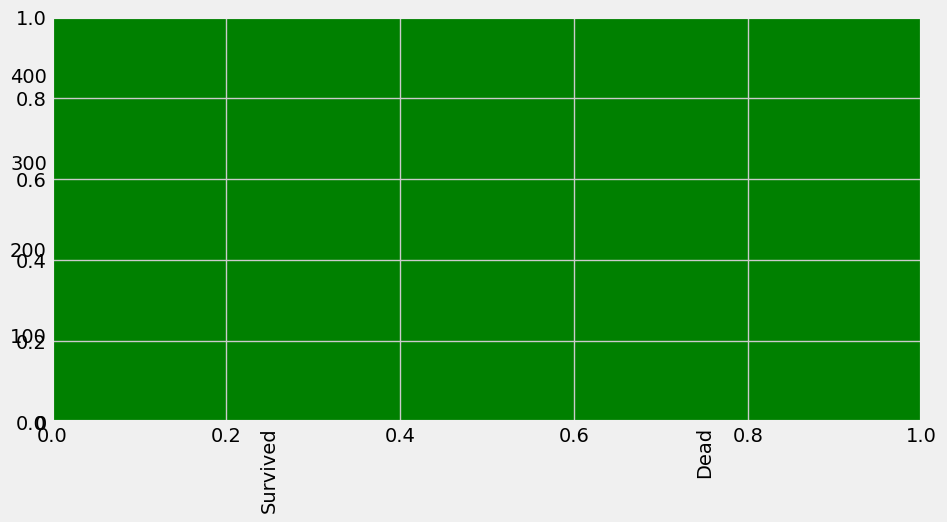

In [30]:
bar_chart("Parch")

Parch
0    678
1    118
2     73
5      5
3      5
4      4
6      1
Name: count, dtype: int64


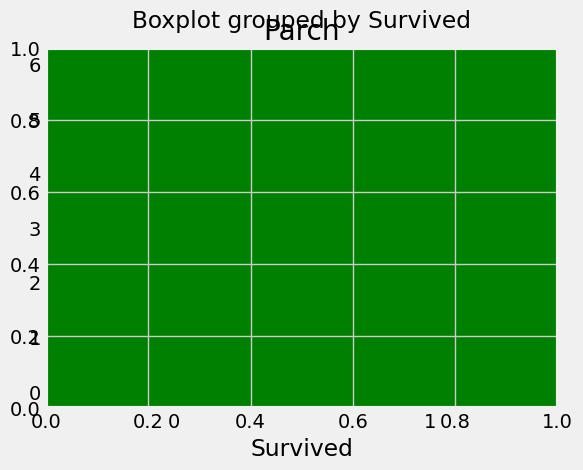

In [31]:
print(train["Parch"].value_counts())
box_plot("Parch")

In [32]:
train.nlargest(6,["Parch"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",1,43.0,1,6,46.9000,S
13,0,3,"Andersson, Mr. Anders Johan",0,39.0,1,5,31.2750,S
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",1,38.0,1,5,31.3875,S
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",1,39.0,1,5,31.2750,S
638,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",1,41.0,0,5,39.6875,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,29.1250,Q


In [33]:
train=train.drop([678,13,25,610,638,885])
train.shape

(878, 9)

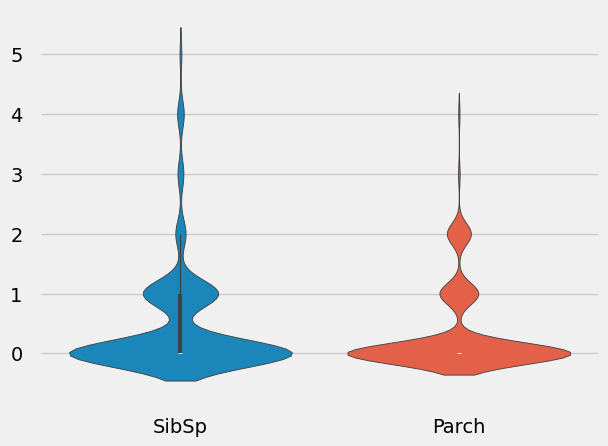

In [34]:

f,ax=plt.subplots()
sns.violinplot(data=train.iloc[:,5:7])
sns.despine(offset=10,trim=True)

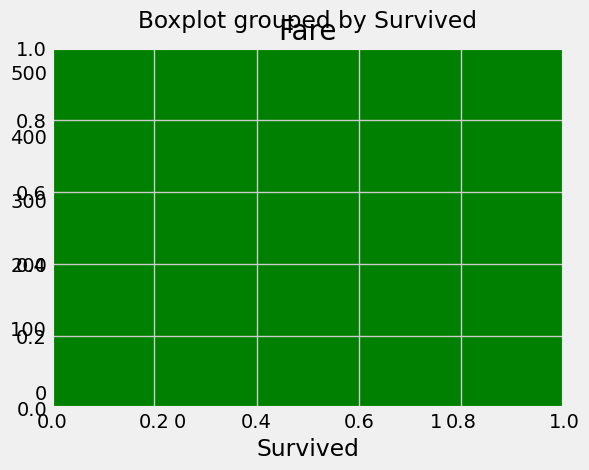

In [35]:
box_plot("Fare")

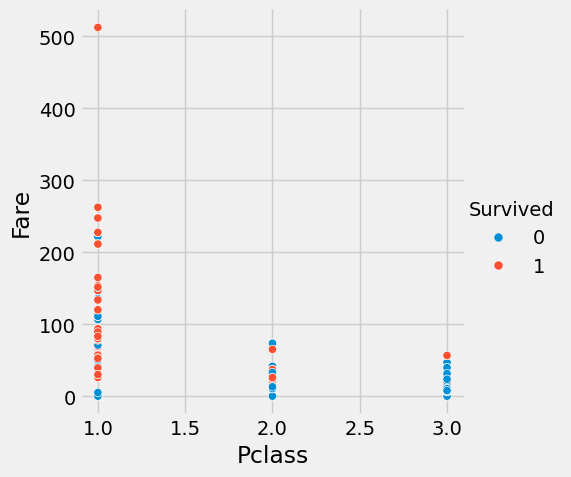

In [36]:
sns.relplot(x="Pclass",y="Fare",hue="Survived",data=train);

In [37]:
def hist(column):
    train[column].plot(kind = 'hist',bins = 200,figsize = (6,6))
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.show()

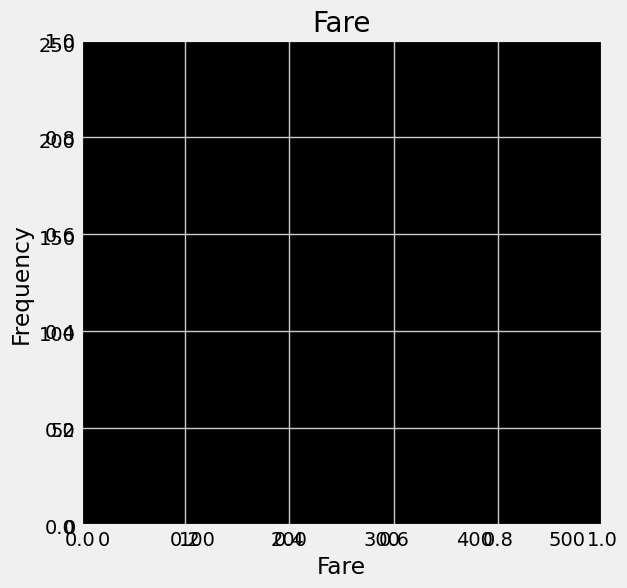

In [38]:
hist("Fare")

In [39]:
fig=px.scatter(train,x="Age",y="Survived",size="Fare",color="Fare",log_x=True,size_max=50,
              template="plotly_dark",title="Age vs survived")
fig.show()

In [40]:
fig=px.scatter_3d(train,x="Age",y="Survived",z="Fare",color="Fare",log_x=True,size_max=60,
              template="plotly_dark",title="Age vs survived vs Fare")
fig.show()

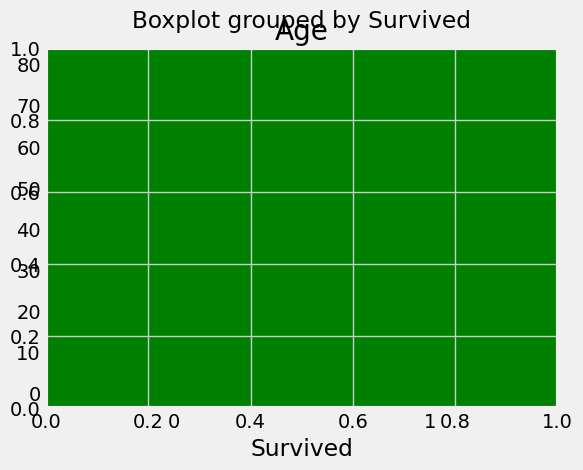

In [41]:
box_plot("Age")

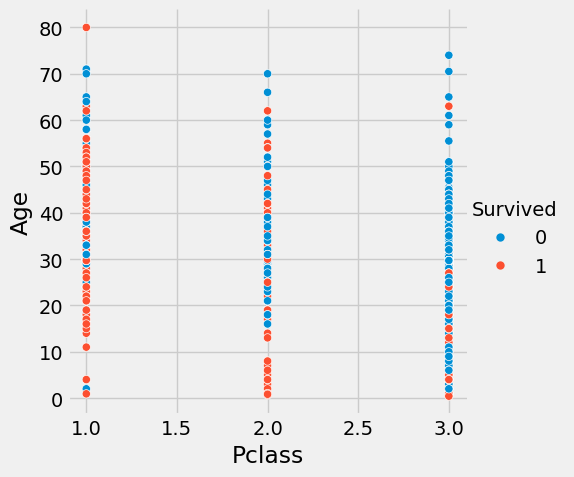

In [42]:
sns.relplot(x="Pclass",y="Age",hue="Survived",data=train);

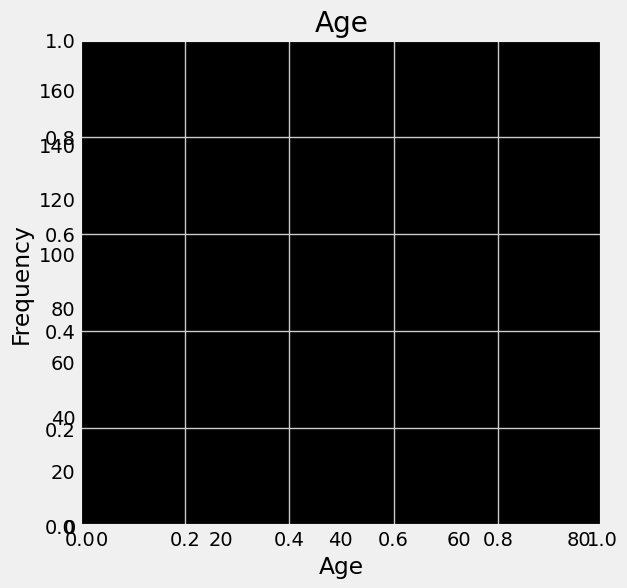

In [43]:
hist("Age")

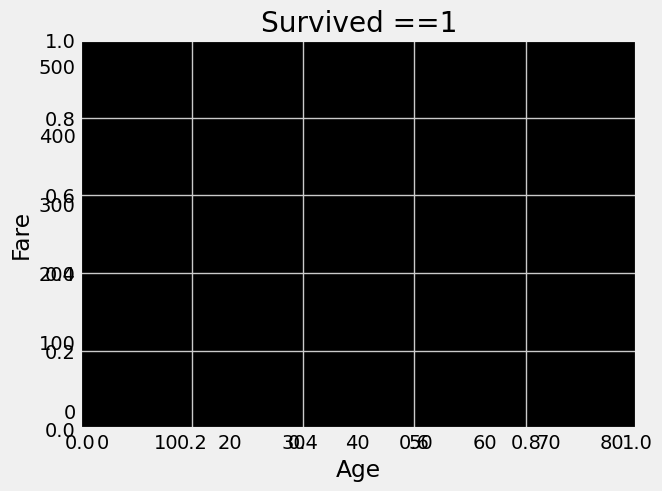

In [44]:
train[train.Survived ==1].plot(kind='scatter', x='Age', y='Fare',color="red")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Survived ==1")
plt.grid(True)
ax = plt.axes()
ax.set_facecolor("black")
plt.show()

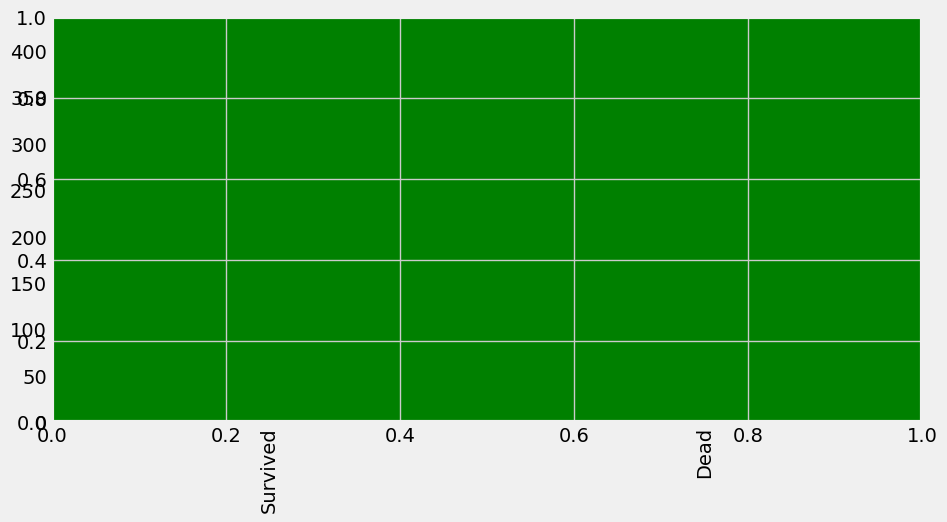

In [45]:
bar_chart("Embarked")

In [46]:
print(train['Embarked'].value_counts())

Embarked
S    634
C    168
Q     76
Name: count, dtype: int64


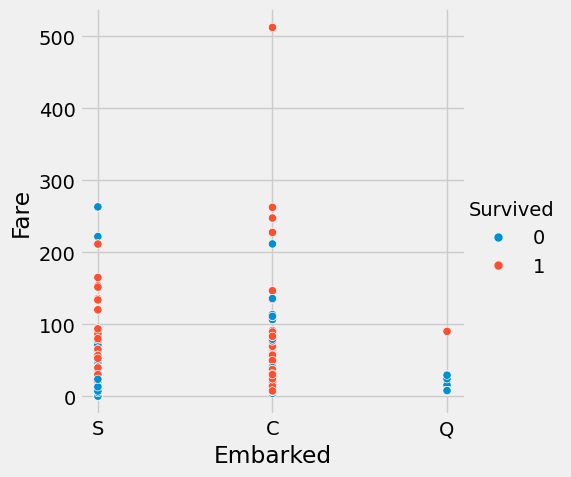

In [47]:

sns.relplot(x="Embarked",y="Fare",hue="Survived",data=train);

In [48]:
train.loc[train['Embarked'] == "C", 'Embarked'] = 0
train.loc[train['Embarked'] == "Q", 'Embarked'] = 1
train.loc[train['Embarked'] == "S", 'Embarked'] = 2

In [49]:
train["Title"]=train["Name"].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
train["Title"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [50]:
train["Title"]=train["Title"].replace([" Don"," Rev"," Dr"," Major"," Lady"," Sir"," Col"," Capt"," the Countess"," Jonkheer"],"Rare")
train["Title"]=train["Title"].replace([" Mlle", " Ms"," Dona"]," Miss")
train["Title"]=train["Title"].replace([" Mme"," Mrs"]," Mr")
train["Title"].unique()

array([' Mr', ' Miss', ' Master', 'Rare'], dtype=object)

In [51]:
mapping={' Mr':0, ' Miss':1, ' Master':2, 'Rare':3}
train["Title"]=train["Title"].map(mapping)

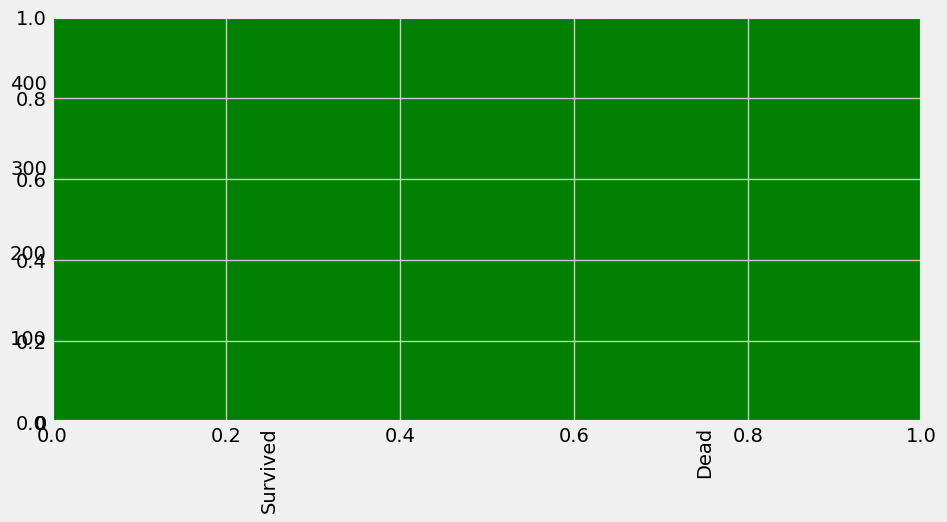

In [52]:
bar_chart("Title")

In [53]:
print(train["Title"].value_counts())

Title
0    634
1    182
2     39
3     23
Name: count, dtype: int64


In [54]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2,0


In [55]:
train=train.drop(["Name"],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2,0
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,2,1
3,1,1,1,35.0,1,0,53.1000,2,0
4,0,3,0,35.0,0,0,8.0500,2,0


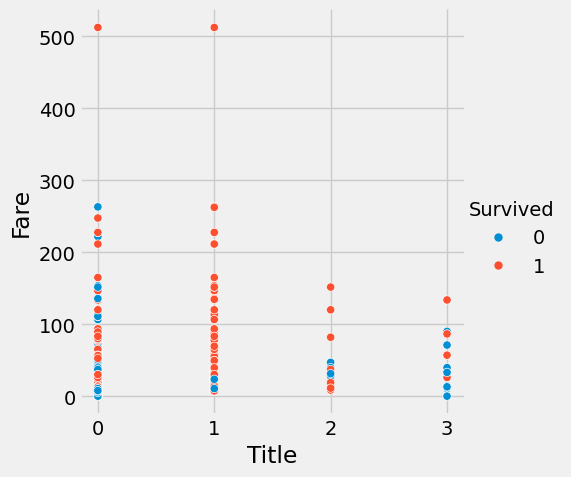

In [56]:
sns.relplot(x="Title",y="Fare",hue="Survived",data=train);

<Figure size 1000x1000 with 0 Axes>

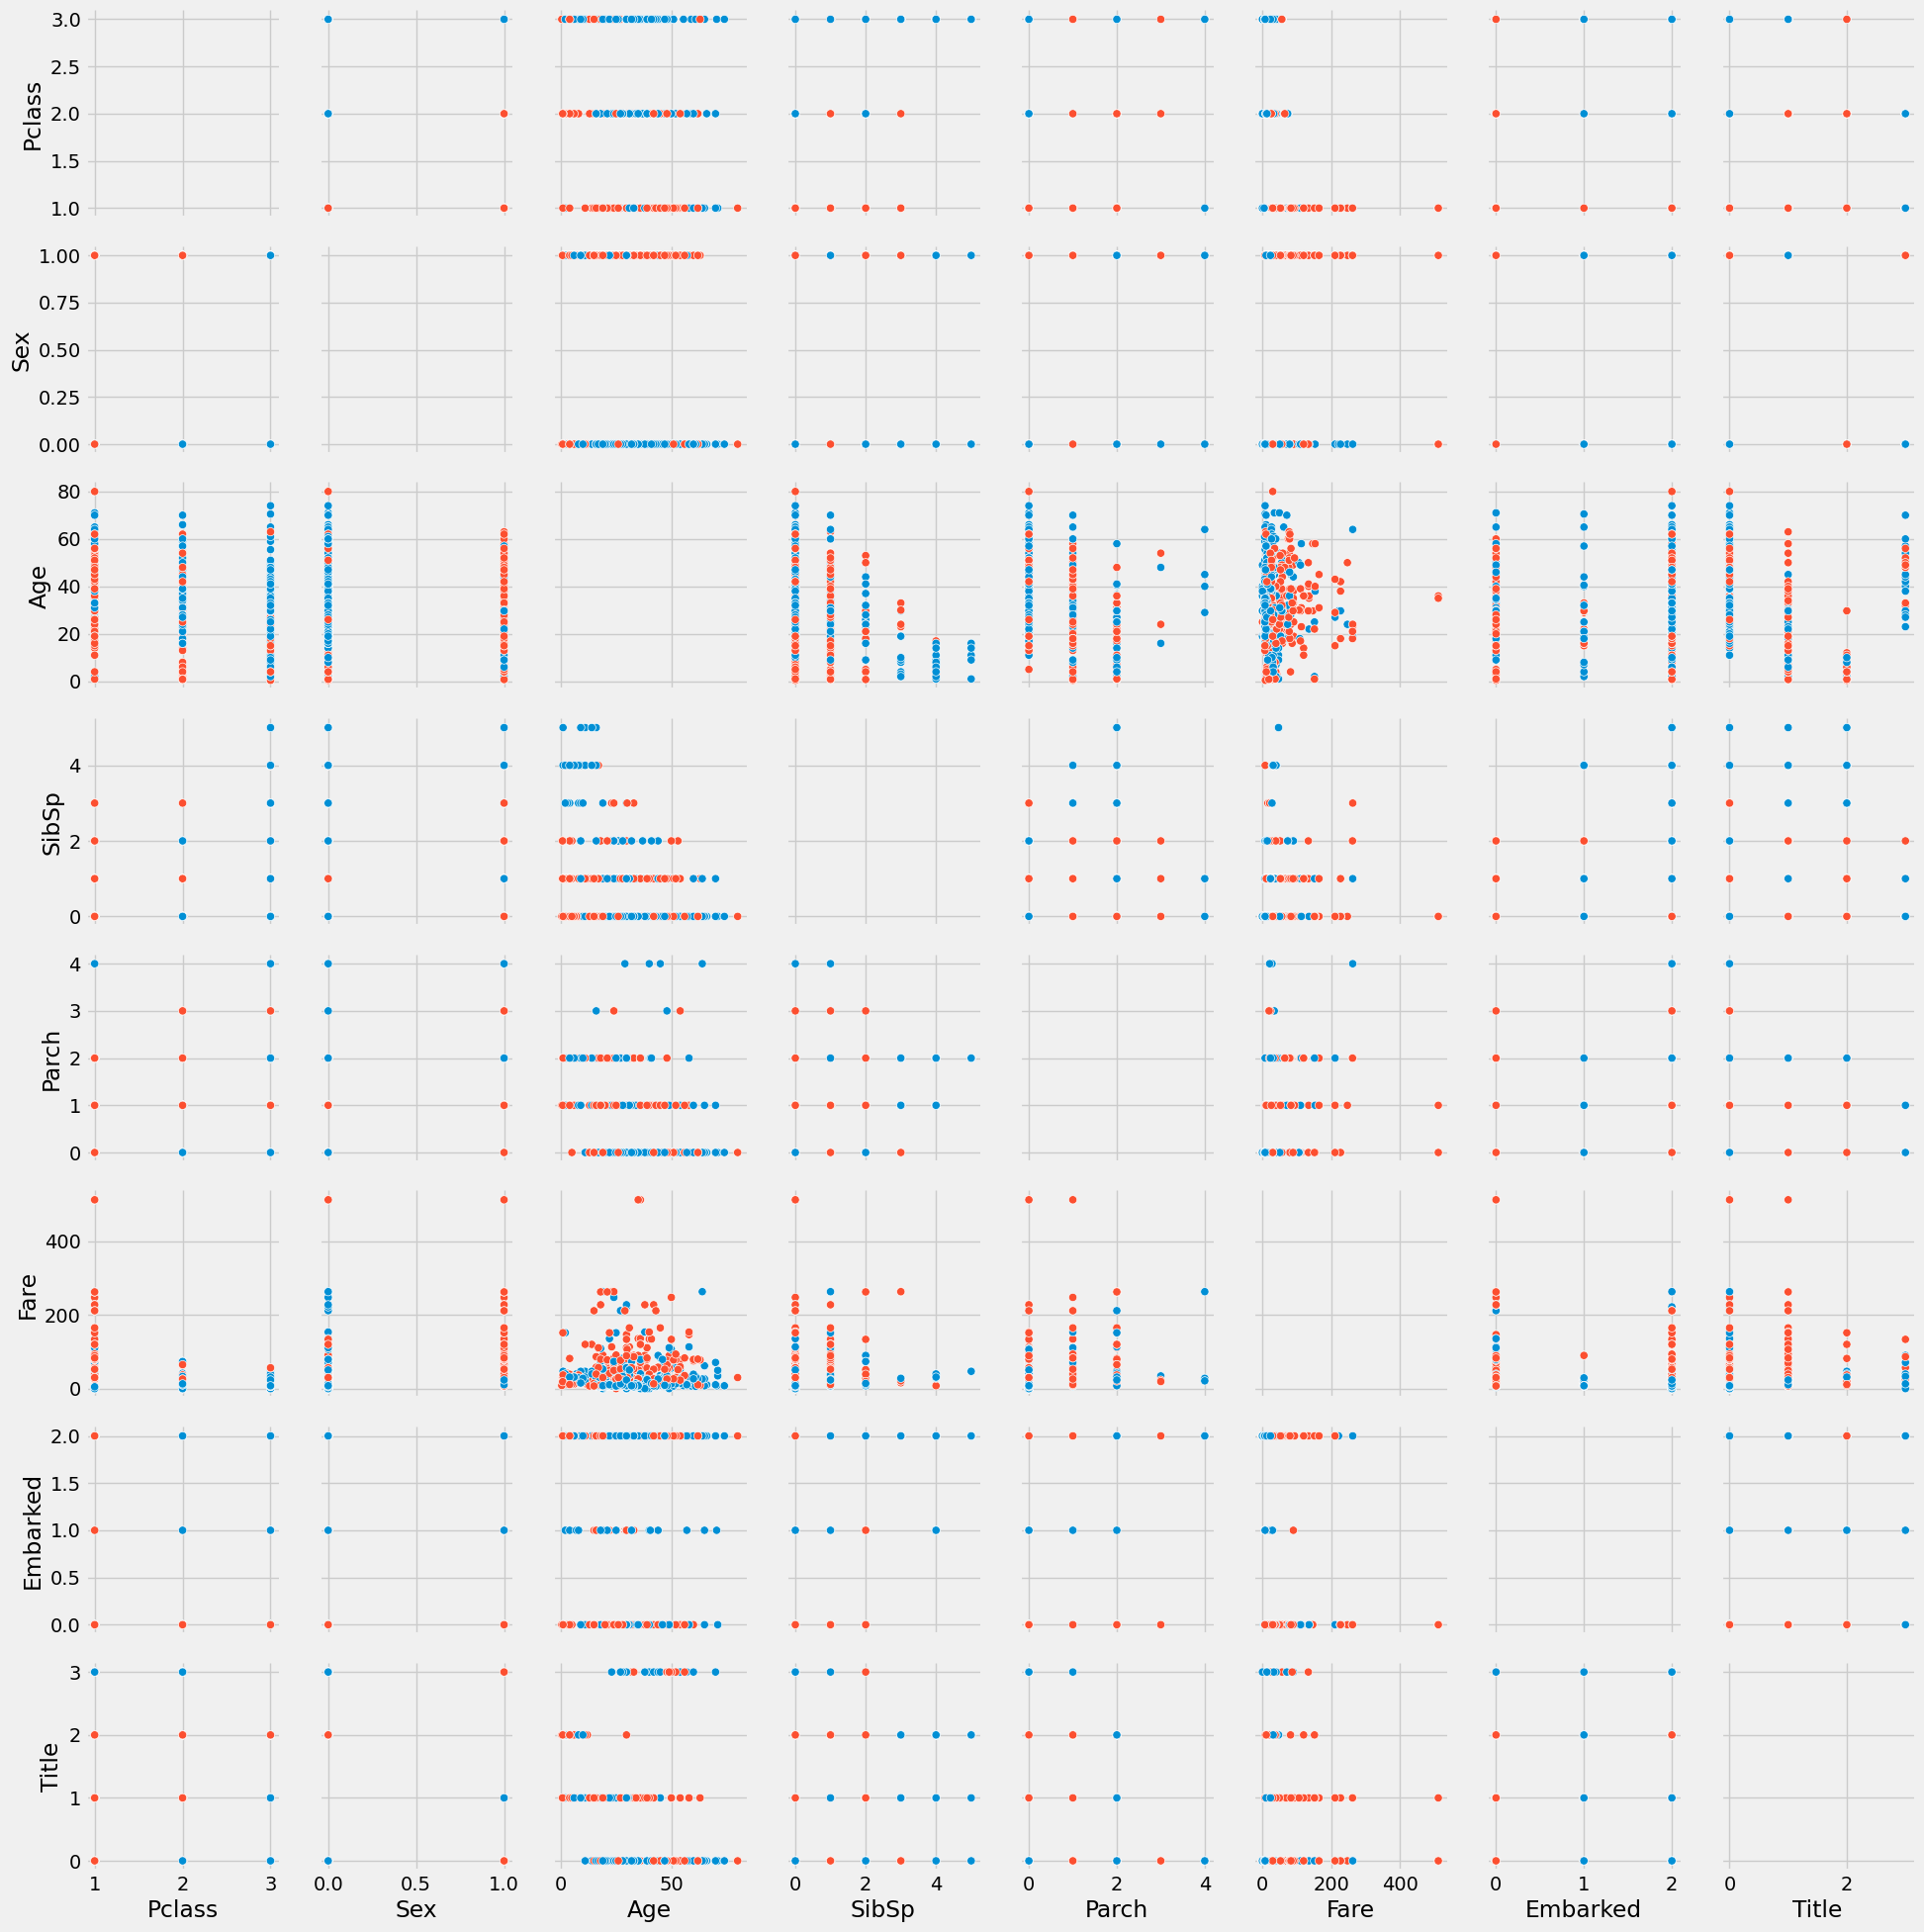

In [57]:
plt.figure(figsize=(10, 10))
g=sns.PairGrid(train,hue="Survived")
g.map_offdiag(sns.scatterplot)
g.add_legend
plt.show()

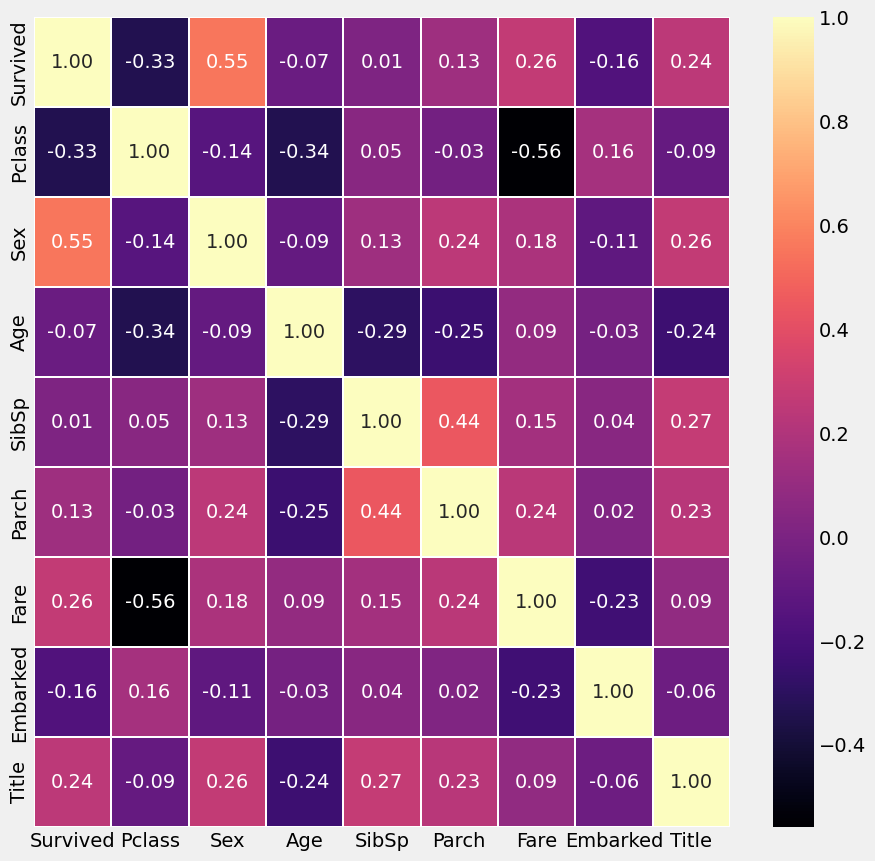

In [58]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [59]:
df=train.drop(["Age","Fare"],axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title
0,0,3,0,1,0,2,0
1,1,1,1,1,0,0,0
2,1,3,1,0,0,2,1
3,1,1,1,1,0,2,0
4,0,3,0,0,0,2,0
